Problematic to Solve:

The Predictive Health Monitoring System addresses several challenges in the healthcare domain, aiming to overcome limitations in traditional healthcare approaches:

Reactive Healthcare:
Traditional healthcare systems often operate reactively, addressing health issues after they have manifested. Lack of early detection may lead to delayed interventions, impacting the effectiveness of treatment and potentially escalating healthcare costs.

Limited Personalization:
One-size-fits-all healthcare approaches may not consider individual variations in health conditions and lifestyles. Personalized healthcare is essential for effective prevention and management of health issues. 

Data Overload:
With the proliferation of health data from various sources, individuals and healthcare professionals face challenges in extracting meaningful insights. There is a need for intelligent systems that can analyze diverse health data and provide actionable information. 

Preventable Health Conditions:
Many health conditions are preventable or manageable if detected early. Lack of timely information and early warning systems can contribute to the prevalence of preventable health issues.

Final Objective:

The ultimate goal of the Predictive Health Monitoring System is to transform healthcare into a proactive, personalized, and data-driven model. The system aims to achieve the following objectives:

Early Detection:
Enable early detection of potential health issues by leveraging machine learning algorithms to analyze historical health data.
Provide individuals and healthcare professionals with timely alerts and warnings based on predictive analytics.

Personalized Healthcare:
Implement a system that considers individual health profiles, lifestyle factors, and genetic predispositions.
Offer personalized recommendations for preventive measures, lifestyle modifications, and intervention strategies.

Improved Patient Outcomes:
Contribute to improved patient outcomes by facilitating early interventions and tailored healthcare plans.
Reduce the severity and progression of health conditions through timely and informed decision-making.

Efficient Healthcare Resource Utilization:
Optimize the allocation of healthcare resources by focusing on preventive measures and early interventions.
Reduce the strain on healthcare facilities by minimizing the occurrence of advanced-stage health issues.

User Empowerment:
Empower individuals to actively manage their health by providing them with insights into their health trends, risk factors, and preventive measures.Foster a sense of ownership and responsibility for one's well-being.

Integration with Healthcare Systems:
Establish seamless integration with existing healthcare systems to ensure collaboration between individuals and healthcare professionals. Prioritize interoperability, data security, and compliance with healthcare regulations.

Ethical and Privacy Considerations:
Uphold ethical standards in the collection, handling, and use of sensitive health data. Prioritize user privacy, informed consent, and responsible data management practices.

By achieving these objectives, the Predictive Health Monitoring System seeks to revolutionize healthcare practices, shifting from reactive models to proactive, personalized, and data-driven approaches that enhance overall health outcomes and well-being

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('Predictive Health Monitoring Dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


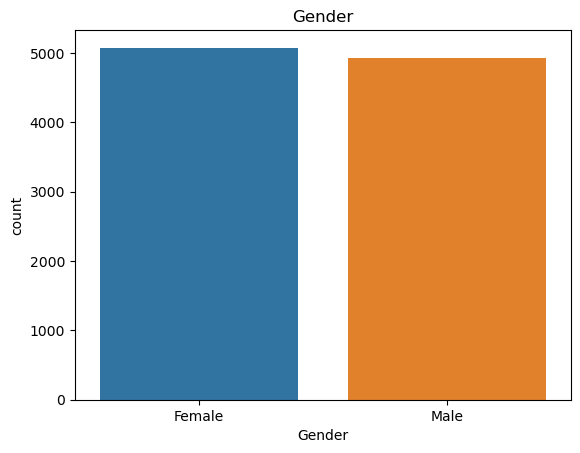

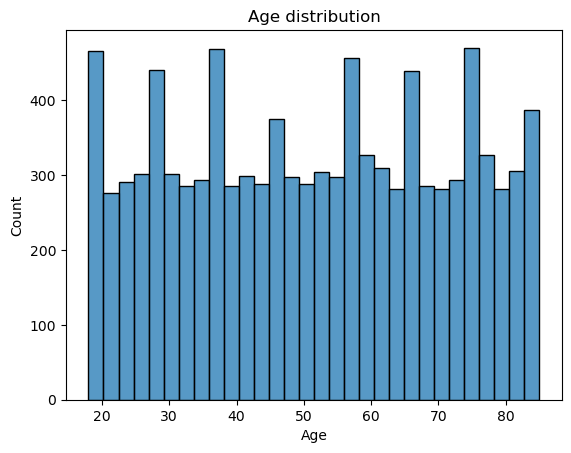

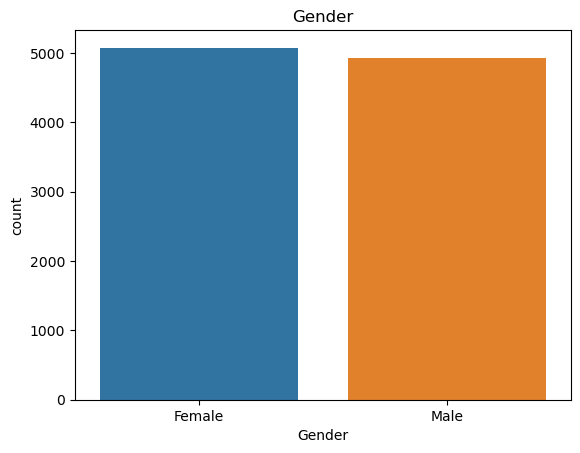

In [18]:
# Countplot for survival
sns.countplot(x='Gender', data=df)
plt.title('Gender')
plt.show()

# Histogram for Age distribution
sns.histplot(df['Age'].dropna(), bins=30)
plt.title('Age distribution')
plt.xlabel('Age')
plt.show()

# Countplot for survival based on gender
sns.countplot(x='Gender', data=df)
plt.title('Gender')
plt.show()

In [19]:
print(df['Medical Condition'].head().isnull())

0    False
1    False
2    False
3    False
4    False
Name: Medical Condition, dtype: bool


In [20]:
# Check summary statistics of the numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

                Age  Billing Amount   Room Number
count  10000.000000    10000.000000  10000.000000
mean      51.452200    25516.806778    300.082000
std       19.588974    14067.292709    115.806027
min       18.000000     1000.180837    101.000000
25%       35.000000    13506.523967    199.000000
50%       52.000000    25258.112566    299.000000
75%       68.000000    37733.913727    400.000000
max       85.000000    49995.902283    500.000000
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


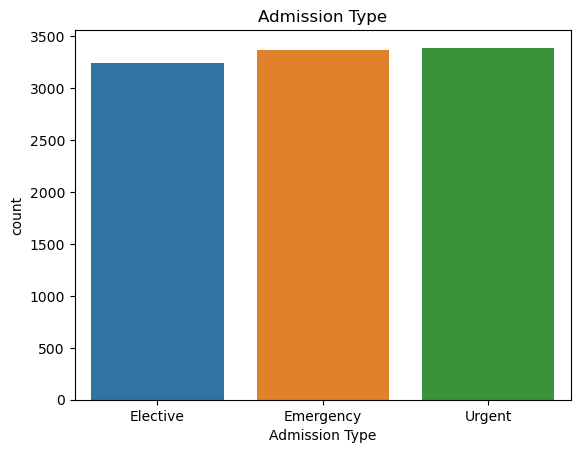

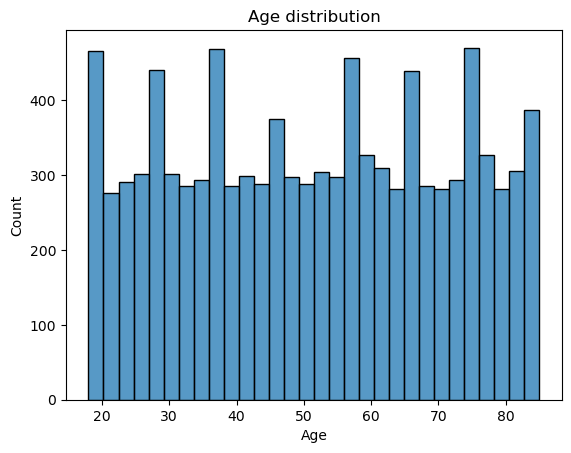

In [21]:
# Countplot for Admission Type
sns.countplot(x='Admission Type', data=df)
plt.title('Admission Type')
plt.show()

# Histogram for Age distribution
sns.histplot(df['Age'].dropna(), bins=30)
plt.title('Age distribution')
plt.xlabel('Age')
plt.show()


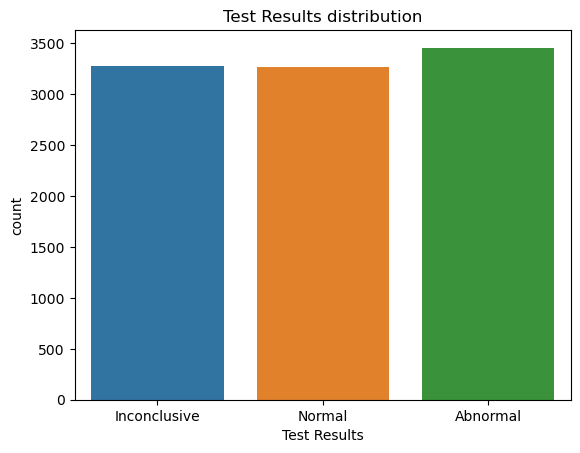

In [23]:
# Countplot for Test Results
sns.countplot(x='Test Results', data=df)
plt.title('Test Results distribution')
plt.show()

In [25]:
# Identify numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Handling Missing Values in Numeric Columns
numeric_imputer = SimpleImputer(strategy="mean")
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Handling Missing Values in Non-Numeric Columns
non_numeric_imputer = SimpleImputer(strategy="most_frequent")  # You can use other strategies based on your data
df[non_numeric_columns] = non_numeric_imputer.fit_transform(df[non_numeric_columns])

# Removing Duplicates
df_cleaned = df.drop_duplicates()

In [26]:
# Outliers Detection (using IQR)
Q1 = df_cleaned[numeric_columns].quantile(0.25)
Q3 = df_cleaned[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_cleaned[~((df_cleaned[numeric_columns] < (Q1 - 1.5 * IQR)) | (df_cleaned[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'Medical Condition' is the target variable
# Prepare features and target variable
features = ['Age', 'Gender', 'Medical Condition', 'Blood Type']  # Example features used for prediction
X = df[features]
y = df['Admission Type']

# Handle categorical variables (convert categorical to numerical)
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)  # Convert 'Sex' to numerical

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'Diabetes'